In [545]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Ingestion

In [546]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

# Rename columns to use with dot notation
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

In [547]:
df.describe(include='all')

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


# Data Preprocessing

In [548]:
# After analysis, columns reason_for_absence and month_of_absence shows min. values as 0 which is to be treated as NaN
# So, we import the dataset again treating the same

df.loc[df.month_of_absence == 0,'month_of_absence'] = np.NaN

In [549]:
# The column disciplinary_failure = 1 means that there is some disciplinary enquiry against the person. Upon
# analysing, we see that for such observations, the absenteeism hours is 0. This could be because, these employees
# might have been under warning. So, we create another reason_for_absence category (value = 29) for such observations
# Once, we have included reason code = 29 in our dataset, there is no need for disciplinary_failure column. Hence, 
# drop the same

df.loc[df.disciplinary_failure==1,'reason_for_absence'] = 29
df = df.drop('disciplinary_failure',axis=1)

In [550]:
cat_columns = ['reason_for_absence','month_of_absence','day_of_the_week','seasons','education']
for column in cat_columns:
    df[column] = df[column].astype('category')

bool_columns = ['social_drinker','social_smoker']
for column in bool_columns:
    df[column] = df[column].astype('bool')

# Check datatype for each column in Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
id                                 740 non-null int64
reason_for_absence                 740 non-null category
month_of_absence                   737 non-null category
day_of_the_week                    740 non-null category
seasons                            740 non-null category
transportation_expense             740 non-null int64
distance_from_residence_to_work    740 non-null int64
service_time                       740 non-null int64
age                                740 non-null int64
work_load_average/day              740 non-null float64
hit_target                         740 non-null int64
education                          740 non-null category
son                                740 non-null int64
social_drinker                     740 non-null bool
social_smoker                      740 non-null bool
pet                                740 non-null int64
weight          

In [551]:
# The reason_for_absence and month_of_absence columns shows 43 and 3 NaN values
df.isnull().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   3
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

In [552]:
# Check the shape of dataframe
df.shape

(740, 20)

### Impute missing values in Month of Absence column

In [553]:
df[df.month_of_absence.isnull()]

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
737,4,0,NaN,3,1,118,14,13,40,271.219,95,1,1,True,False,8,98,170,34,0
738,8,0,NaN,4,2,231,35,14,39,271.219,95,1,2,True,False,2,100,170,35,0
739,35,0,NaN,6,3,179,45,14,53,271.219,95,1,1,False,False,1,77,175,25,0


In [554]:
# Impute values of specific rows with mode from above groupby object
df.iloc[737, 2] = 7
df.iloc[738, 2] = 2
df.iloc[739, 2] = 5

### Impute missing values in Reason for Absence column

In [555]:
# For rows where reason_for_absence is 0, we see that absenteeism time in hours is 0.
# Hence, we impute this with our new category = 29

df.loc[df.reason_for_absence == 0, 'reason_for_absence'] = 29

In [556]:
# There is 1 row where hours = 0 and reason is 27
# Impute this row with mean value for reason_for_absence = 27
df.loc[((df.absenteeism_time_in_hours == 0) & (df.reason_for_absence == 27)),'absenteeism_time_in_hours'] = \
    df[df['reason_for_absence']==27].absenteeism_time_in_hours.mean()

In [557]:
df[df.absenteeism_time_in_hours==0].head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
1,36,29,7.0,3,1,118,13,18,50,239.554,97,1,1,True,False,0,98,178,31,0.0
50,20,29,9.0,2,4,260,50,11,36,241.476,92,1,4,True,False,0,65,168,23,0.0
51,29,29,9.0,2,4,225,26,9,28,241.476,92,1,1,False,False,2,69,169,24,0.0
54,11,29,9.0,3,4,289,36,13,33,241.476,92,1,2,True,False,1,90,172,30,0.0
55,36,29,9.0,3,4,118,13,18,50,241.476,92,1,1,True,False,0,98,178,31,0.0


In [558]:
# Below, we see that there are some months which overlap in 2 seasons
# We will merge months into seasons where the count is more
# e.g., Month 6 is in Season 1 (count = 16) and Season 3 (count = 33). 
# Hence, it should be merged in Season 3 (new_count = 49)
# Similarly for other months too

df.groupby(by=['seasons','month_of_absence']).id.count()

seasons  month_of_absence
1        6.0                 16
         7.0                 68
         8.0                 54
         9.0                 32
2        1.0                 50
         2.0                 73
         3.0                 60
         12.0                 9
3        3.0                 27
         4.0                 53
         5.0                 65
         6.0                 38
4        9.0                 21
         10.0                71
         11.0                63
         12.0                40
Name: id, dtype: int64

In [559]:
df.loc[(df.month_of_absence==6) & (df.seasons==1),'seasons'] = 3
df.loc[(df.month_of_absence==12) & (df.seasons==2),'seasons'] = 4
df.loc[(df.month_of_absence==9) & (df.seasons==4),'seasons'] = 1
df.loc[(df.month_of_absence==3) & (df.seasons==3),'seasons'] = 2

In [560]:
# After making the above changes, the seasons and months are arranged properly
df.groupby(by=['seasons','month_of_absence']).id.count()

seasons  month_of_absence
1        7.0                 68
         8.0                 54
         9.0                 53
2        1.0                 50
         2.0                 73
         3.0                 87
3        4.0                 53
         5.0                 65
         6.0                 54
4        10.0                71
         11.0                63
         12.0                49
Name: id, dtype: int64

# Data Exploration

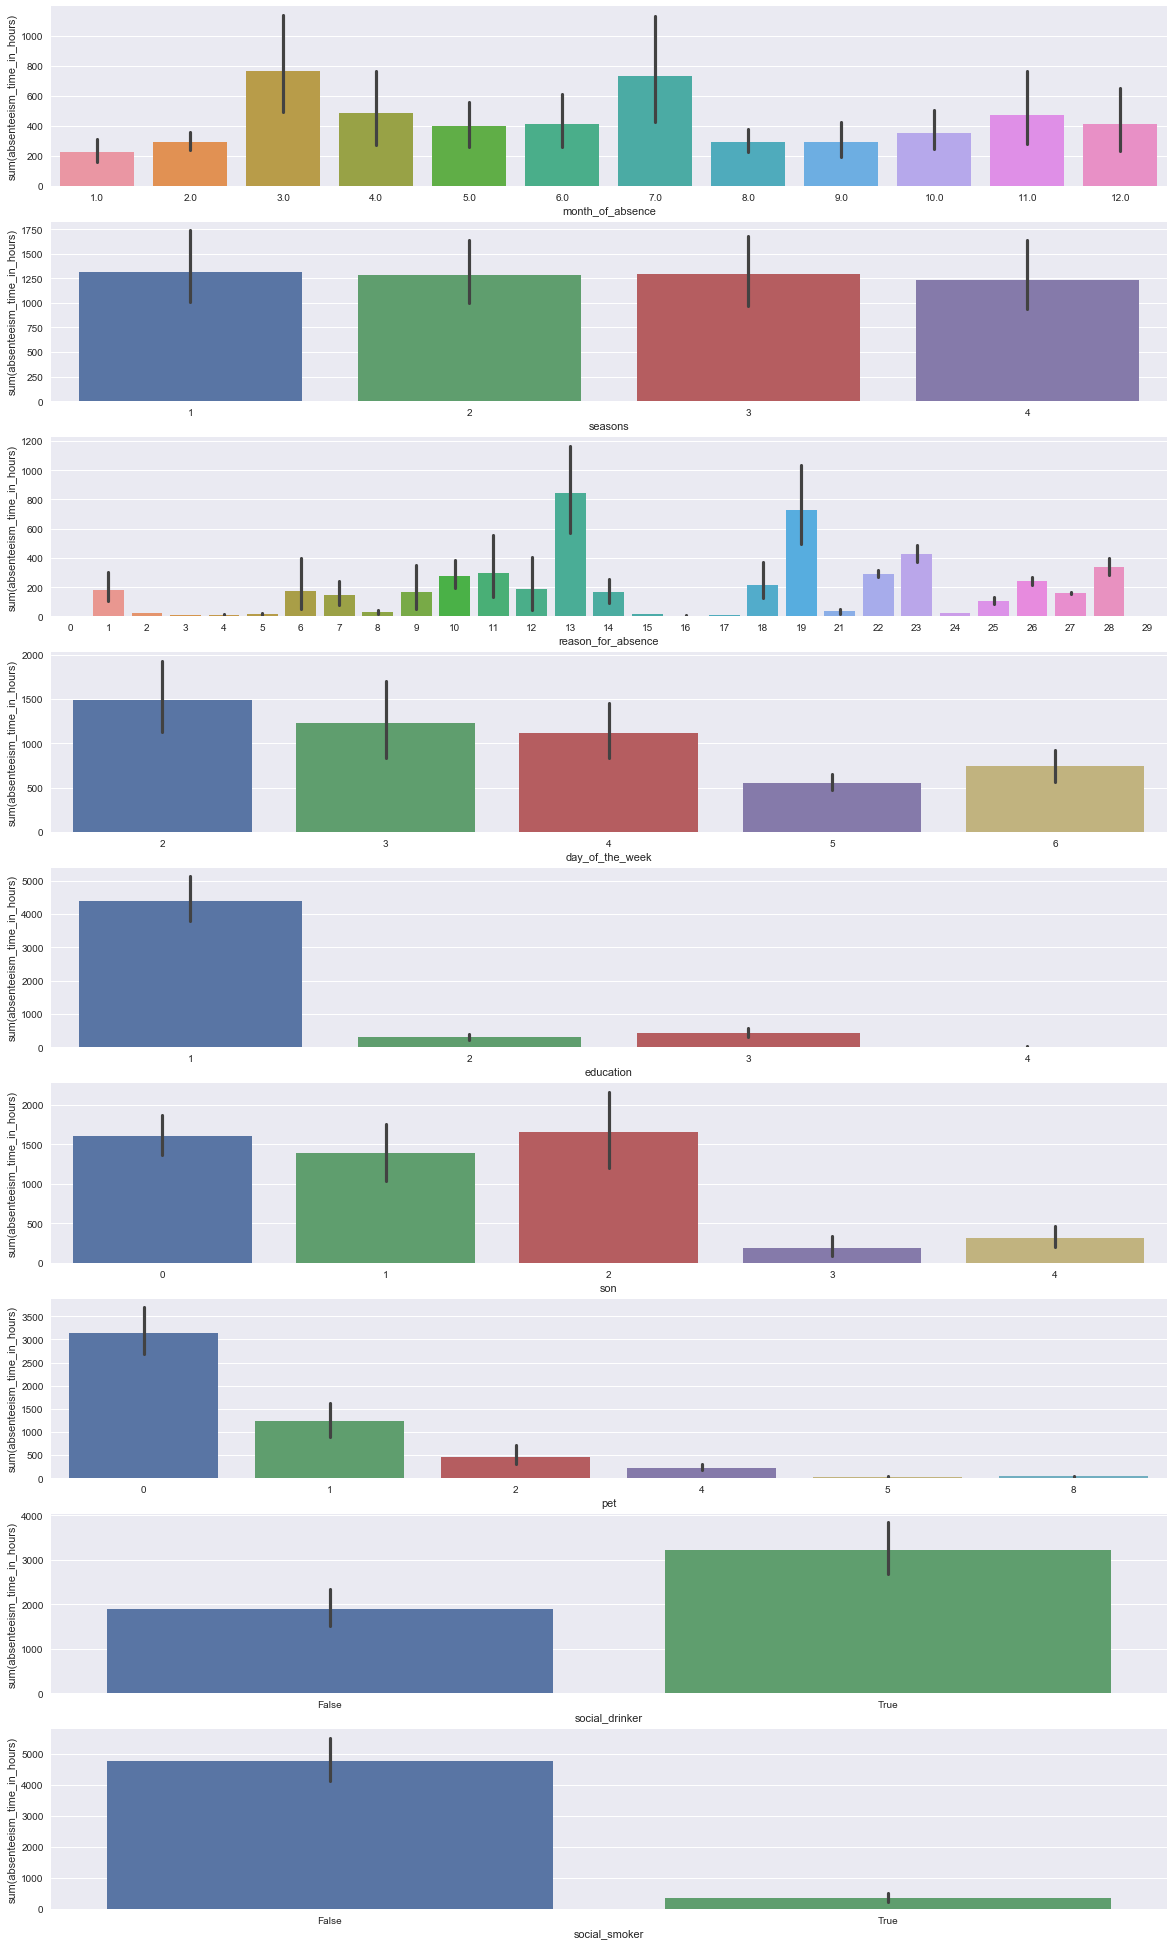

In [561]:
fig, axes = plt.subplots(9, 1)
fig.set_figheight(35)
fig.set_figwidth(20)

# For categorical columns
sns.barplot(x='month_of_absence',y='absenteeism_time_in_hours',data=df,estimator=np.sum, ax=axes[0])
sns.barplot(x='seasons',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[1])
sns.barplot(x='reason_for_absence',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[2])
sns.barplot(x='day_of_the_week',y='absenteeism_time_in_hours',data=df,estimator=np.sum, ax=axes[3])
sns.barplot(x='education',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[4])
sns.barplot(x='son',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[5])
sns.barplot(x='pet',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[6])

# For boolean columns
sns.barplot(x='social_drinker',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[7])
sns.barplot(x='social_smoker',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[8])

### From the above bar plot, the following can be inferred
- <i>Highest absence is in months of March, July and November
- <i>Most absence are due to reason codes 13, 19, 23 and 28
- <i>Absenteeism hours decrease with increase in Education level (because data is mostly for education_level = 0)
- <i>People who are social drinker tend to be absent more
- <i>Maximum absenteeism happens on Monday

## Handling of Categorical Data

In [562]:
# Seasons and months are highly correlated to each other, hence dropping seasons column

df = df.drop('seasons',axis=1)

In [563]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=False)
df.head()

,id,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,son,social_drinker,social_smoker,...,month_of_absence_12.0,day_of_the_week_2,day_of_the_week_3,day_of_the_week_4,day_of_the_week_5,day_of_the_week_6,education_1,education_2,education_3,education_4
0,11,289,36,13,33,239.554,97,2,True,False,...,0,0,1,0,0,0,1,0,0,0
1,36,118,13,18,50,239.554,97,1,True,False,...,0,0,1,0,0,0,1,0,0,0
2,3,179,51,18,38,239.554,97,0,True,False,...,0,0,0,1,0,0,1,0,0,0
3,7,279,5,14,39,239.554,97,2,True,True,...,0,0,0,0,1,0,1,0,0,0
4,11,289,36,13,33,239.554,97,2,True,False,...,0,0,0,0,1,0,1,0,0,0


## Outlier Analysis

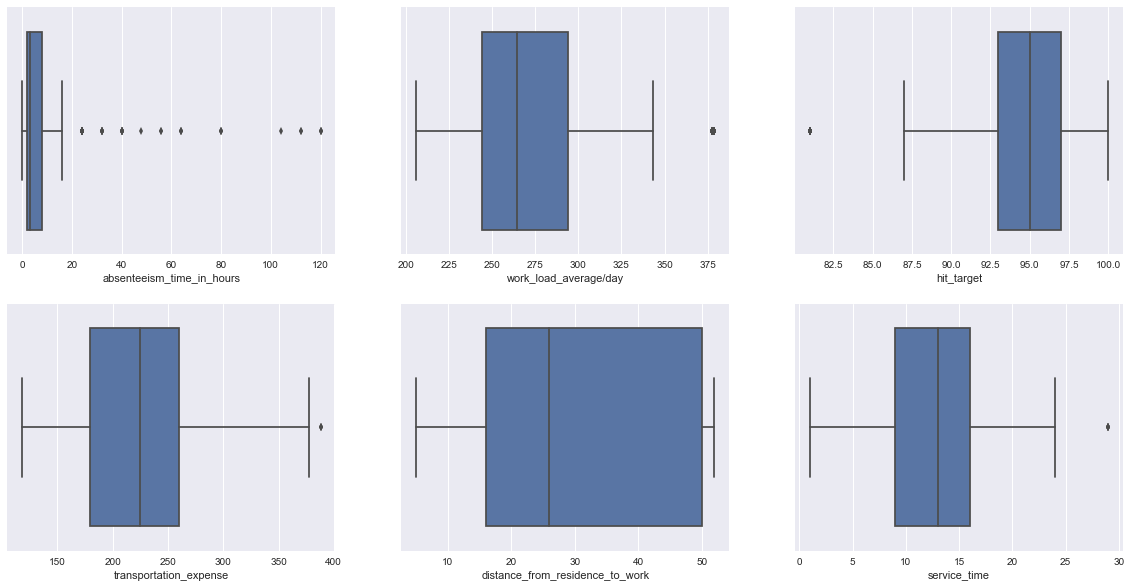

In [564]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x='absenteeism_time_in_hours', data=df, ax=axes[0][0])
sns.boxplot(x='work_load_average/day', data=df, ax=axes[0][1])
sns.boxplot(x='hit_target', data=df, ax=axes[0][2])
sns.boxplot(x='transportation_expense', data=df, ax=axes[1][0])
sns.boxplot(x='distance_from_residence_to_work', data=df, ax=axes[1][1])
sns.boxplot(x='service_time', data=df, ax=axes[1][2])

In [565]:
# From the above plot, we can see that there are many outliers. But we are going to delete rows only for point 1:
# 1) absenteeism_time_in_hours => 24
# 2) work_load_average/day > 350
# 3) hit_target < 85
# 4) transportation_expense > 380
# 5) service_time > 25

df = df.drop(df[df.absenteeism_time_in_hours >= 24].index).reset_index(drop=True)

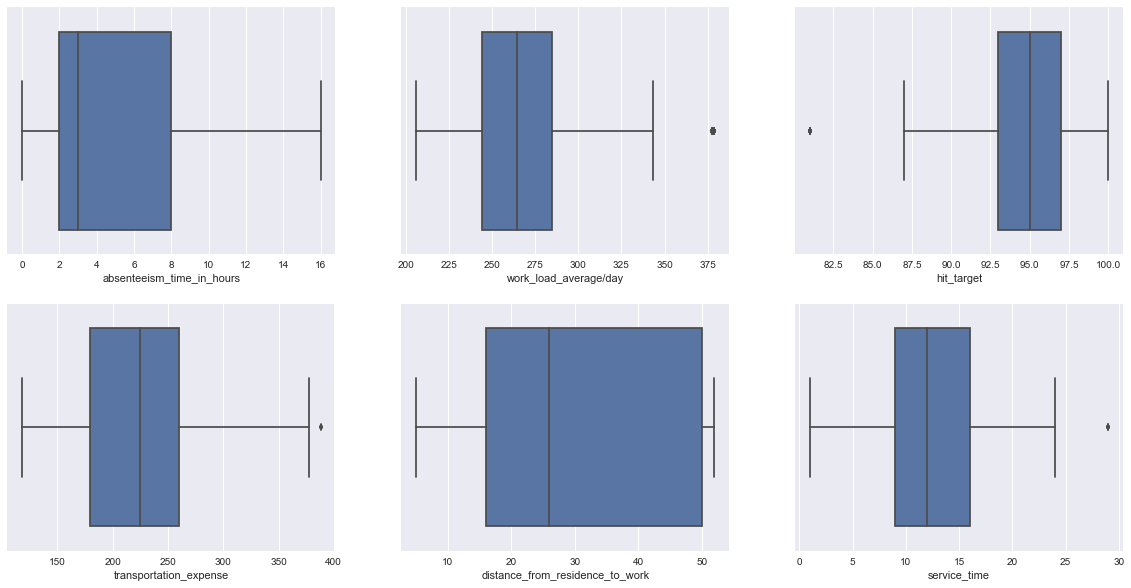

In [566]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x='absenteeism_time_in_hours', data=df, ax=axes[0][0])
sns.boxplot(x='work_load_average/day', data=df, ax=axes[0][1])
sns.boxplot(x='hit_target', data=df, ax=axes[0][2])
sns.boxplot(x='transportation_expense', data=df, ax=axes[1][0])
sns.boxplot(x='distance_from_residence_to_work', data=df, ax=axes[1][1])
sns.boxplot(x='service_time', data=df, ax=axes[1][2])

### From the below heatmap, the following relationships are prominent

- transportation_expense is positively correlated with distance_from_residence_to_work
- service_time is positively correlated with age
- body_mass_index is derived from height and weight, so we can drop height and weight from the prediction model

<b><i> Hence, to remove multicollinearity, we have to remove below columns from our dataset.
- transportation_expense
- service_time
- weight
- height

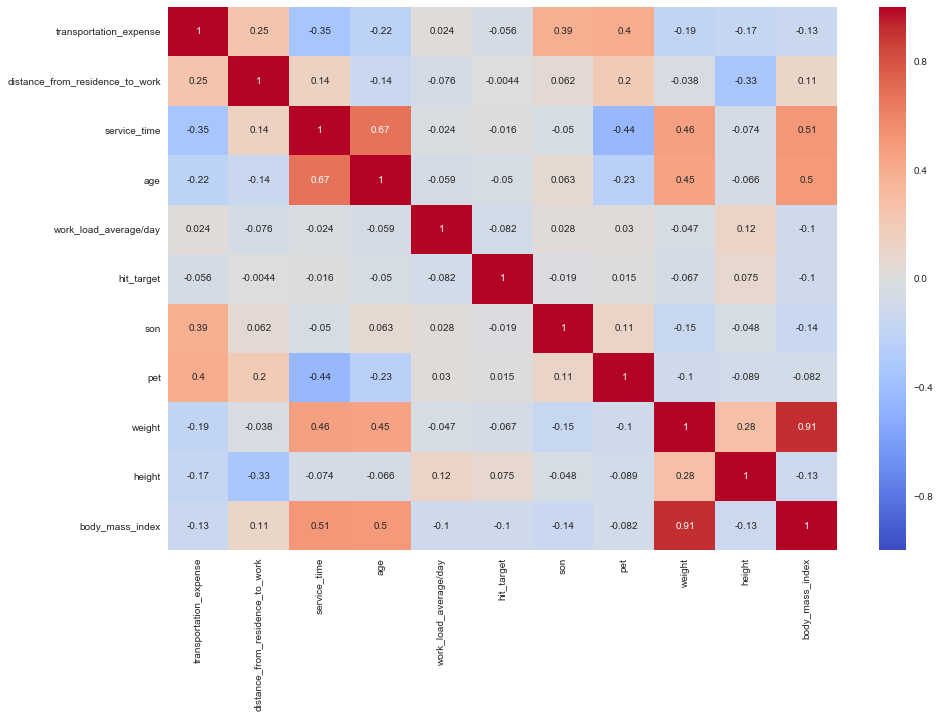

In [567]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
cols = ['transportation_expense', 'distance_from_residence_to_work', 'service_time', 'age', 'work_load_average/day', \
'hit_target', 'son', 'pet', 'weight', 'height', 'body_mass_index']

sns.heatmap(df[cols].corr(),vmin=-1,cmap='coolwarm',annot=True)
plt.show()

In [568]:
# Drop columns as per above to remove Multicollinearity

df = df.drop(['transportation_expense','service_time','weight','height'],axis=1)

### Feature Scaling using MinMaxScaler() function

In [569]:
scaled_columns = ['distance_from_residence_to_work','age','work_load_average/day','hit_target','body_mass_index']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df[scaled_columns].head()

,distance_from_residence_to_work,age,work_load_average/day,hit_target,body_mass_index
0,0.659574,0.193548,0.194471,0.842105,0.578947
1,0.170213,0.741935,0.194471,0.842105,0.631579
2,0.978723,0.354839,0.194471,0.842105,0.631579
3,0.000000,0.387097,0.194471,0.842105,0.263158
4,0.659574,0.193548,0.194471,0.842105,0.578947


## Feature Importance

In [570]:
# To use ExtraTreesClassifier for feature selection, we need to discretize the output variable.
# Discretize using below discretize() method defined
def discretize(item):
    if item == 0:
        return "Present"
    if 0 < item < 8:
        return "Half_Day"
    if item >= 8:
        return "Full_Day"

df['absent_class'] = df.absenteeism_time_in_hours.apply(discretize)

df['absent_class'] = df.absent_class.astype('category')

In [571]:
X_columns_to_use = ['distance_from_residence_to_work','age','work_load_average/day','hit_target', \
                 'son','social_drinker','social_smoker','pet','body_mass_index','reason_for_absence_0',\
                 'reason_for_absence_1','reason_for_absence_2','reason_for_absence_3','reason_for_absence_4',\
                 'reason_for_absence_5','reason_for_absence_6','reason_for_absence_7','reason_for_absence_8',\
                 'reason_for_absence_9', 'reason_for_absence_10','reason_for_absence_11', 'reason_for_absence_12',\
                 'reason_for_absence_13', 'reason_for_absence_14','reason_for_absence_15', 'reason_for_absence_16',\
                 'reason_for_absence_17', 'reason_for_absence_18','reason_for_absence_19', 'reason_for_absence_21',\
                 'reason_for_absence_22', 'reason_for_absence_23','reason_for_absence_24', 'reason_for_absence_25',\
                 'reason_for_absence_26', 'reason_for_absence_27','reason_for_absence_28', 'reason_for_absence_29',\
                 'month_of_absence_1.0', 'month_of_absence_2.0', 'month_of_absence_3.0','month_of_absence_4.0',\
                 'month_of_absence_5.0', 'month_of_absence_6.0','month_of_absence_7.0', 'month_of_absence_8.0',\
                 'month_of_absence_9.0','month_of_absence_10.0', 'month_of_absence_11.0','month_of_absence_12.0',\
                 'day_of_the_week_2', 'day_of_the_week_3','day_of_the_week_4', 'day_of_the_week_5', \
                 'day_of_the_week_6', 'education_1','education_2','education_3', 'education_4']

Y_columns_to_use = ['absent_class']

from sklearn.ensemble import ExtraTreesClassifier

X = df[X_columns_to_use].values[:,:]
Y = df[Y_columns_to_use].values[:,:]

model = ExtraTreesClassifier(random_state=1)
model.fit(X, Y)

/Users/Mayank/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [572]:
for item in zip(X_columns_to_use, model.feature_importances_):
    print(item)

('distance_from_residence_to_work', 0.023901754249927517)
('age', 0.026851269289541985)
('work_load_average/day', 0.035447577398359527)
('hit_target', 0.030889308057417554)
('son', 0.037082644611967482)
('social_drinker', 0.024219330066877681)
('social_smoker', 0.0098507990695399818)
('pet', 0.021843823381828369)
('body_mass_index', 0.031400573867334587)
('reason_for_absence_0', 0.0)
('reason_for_absence_1', 0.01424494387438382)
('reason_for_absence_2', 0.0)
('reason_for_absence_3', 0.00048317392045093806)
('reason_for_absence_4', 5.6406973068911921e-05)
('reason_for_absence_5', 0.0026387346577829806)
('reason_for_absence_6', 0.0050282603959139653)
('reason_for_absence_7', 0.005202474732749836)
('reason_for_absence_8', 0.0020978559179318465)
('reason_for_absence_9', 0.0019426974676277017)
('reason_for_absence_10', 0.011692909147234743)
('reason_for_absence_11', 0.0051854063328875839)
('reason_for_absence_12', 0.0035558919000493266)
('reason_for_absence_13', 0.011830073353929063)
('reas

In [573]:
#Choose threshold value as 0.02 from above to choose features
cols = []
for i, value in enumerate(model.feature_importances_):
    if value>0.02:
        cols.append(X_columns_to_use[i])

In [574]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Fit model using the features selected through ExtraTreesClassifier model
X = df.loc[:,cols]
Y = df.loc[:,'absenteeism_time_in_hours']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

lr = LinearRegression(normalize=True)
lr.fit(X_train,Y_train)
lr.fit(X_train,Y_train)

from sklearn.metrics import mean_squared_error, r2_score
Y_pred = lr.predict(X_test)

RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: " + str(RMSE))
print("r2 Score: " + str(r2_score(Y_test, Y_pred)))

Root Mean Squared Error: 2.76088125453
r2 Score: 0.361457958842


In [575]:
coeff_df = pd.DataFrame(lr.coef_, cols, columns=['Coefficient'])
coeff_df

,Coefficient
distance_from_residence_to_work,-0.215232
age,-1.637281
work_load_average/day,0.667181
hit_target,-0.745155
son,0.291016
social_drinker,0.772308
pet,-0.198722
body_mass_index,0.148366
reason_for_absence_22,1.125312
reason_for_absence_23,-3.558712


In [576]:
print("Intercept: " + str(lr.intercept_))

Intercept: 6.59234455518
